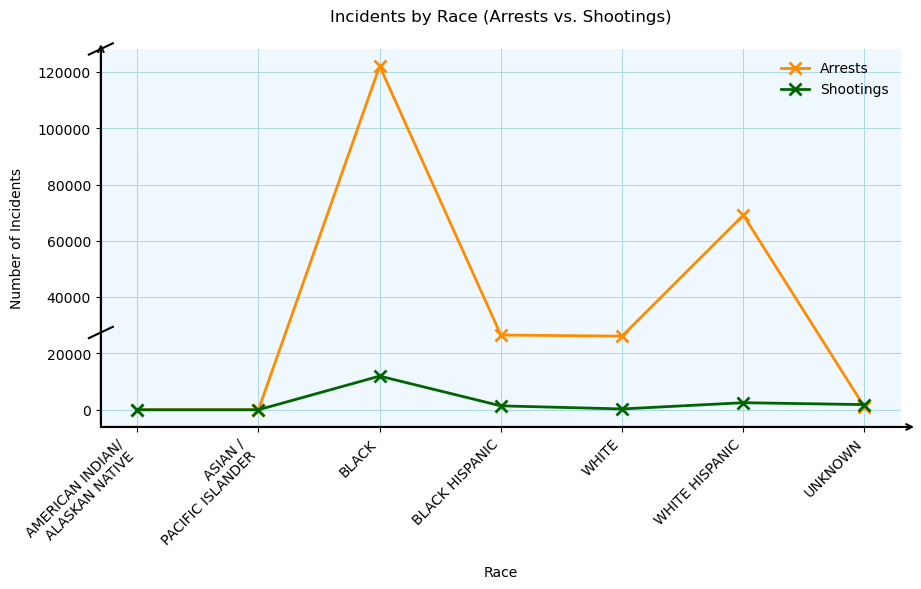

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

merged_df = pd.read_csv("merged_nypd_data.csv", parse_dates=['DATE'], low_memory=False)

races = [
    'AMERICAN INDIAN/\nALASKAN NATIVE',
    'ASIAN /\nPACIFIC ISLANDER',
    'BLACK',
    'BLACK HISPANIC',
    'WHITE',
    'WHITE HISPANIC',
    'UNKNOWN'
]

arrests = merged_df.dropna(subset=['PERP_RACE_x']).groupby('PERP_RACE_x').size().reindex(races).fillna(0)
shootings = merged_df.dropna(subset=['PERP_RACE_y']).groupby('PERP_RACE_y').size().reindex(races).fillna(0)

x = np.arange(len(races))

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#f0f8ff')
ax.grid(color='#add8e6', linestyle='-', linewidth=0.7)

ax.plot(x, arrests.values, color='#ff8c00', linewidth=2, marker='x', markersize=8, markeredgewidth=2, label='Arrests')
ax.plot(x, shootings.values, color='#006400', linewidth=2, marker='x', markersize=8, markeredgewidth=2, label='Shootings')

ax.annotate('', xy=(1.02, 0), xytext=(0, 0), xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->', linewidth=1.5))
ax.annotate('', xy=(0, 1.02), xytext=(0, 0), xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->', linewidth=1.5))

d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (0.25-d, 0.25+d), **kwargs)
ax.plot((-d, +d), (1-d, 1+d), **kwargs)

ax.set_xticks(x)
ax.set_xticklabels(races, rotation=45, ha='right', fontsize=10)
ax.set_xlabel('Race', labelpad=10)
ax.set_ylabel('Number of Incidents', labelpad=10)
ax.set_title('Incidents by Race (Arrests vs. Shootings)', pad=20)

for side in ['top','right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.legend(frameon=False)

plt.subplots_adjust(left=0.1, bottom=0.25)

plt.show()


Data:
Data was loaded directly into the merged_nypd_data file.csv using the pandas library. It only has two columns: PERP_RACE_x and PERP_RACE_y – PERP_RACE_x represents the perpetrator race for arrests, and PERP_RACE_y represents the perpetrator race for shootings. These are used to filter and count the number of incidents by race.

Races:
The chart classifies the data under seven racial categories: AMERICAN INDIAN / ALASKAN NATIVE, ASIAN / PACIFIC ISLANDER, BLACK, BLACK HISPANIC, WHITE, WHITE HISPANIC, and UNKNOWN. These are categories representing the races present in the dataset. Each category is also plotted along the x-axis to show how the counts of incidents fluctuate over these categories for both arrests and shootings.

Data Processing: 
Both arrest and shooting data are cleaned by using dropna() to remove rows with missing values for the associated column. Meanwhile, the groupby() function is used to tally up the offenses by race. The reindex(races) method makes sure the data align with the list of races passed in, but even if there are no data for some groups. Missing values are replaced as 0 with fillna(0) keeping all the categories values to represent on the plot.
Plot Details:

X-Axis:
The seven racial categories are denoted on the x-axis, which is turned for ease of legibility by 45°. The names of these categories are taken directly from the races list, and assist in the comparison of the incidence among racial groups.

Y-Axis:
Number of Arrests and Shootings by Exposure LevelThe y-axis stands for the Number of Incidents (arrests and shootings). This axis represents the occurrence rates for each race in the dataset, and provides information about how the incidents are distributed across different racial groups.

Plot:
The plot differentiates between arrests and shootings. The orange (color: #ff8c00) “x” denote arrests and the green (color: #006400) “x” denote shootings. Both lines illustrate the incidence trends by race, and it’s easy to visually compare the two natures of incidents by race.

Annotations:
The expansion outside the plot region is indicated by the two arrows outward marked from the axes in the plot. HADES WEAPONS: These arrows are forged through the ax. annotate() function, which adds an arrow style of both axis (x and y). Such annotations emphasize the extents of the plot visualization, give this graph more dynamic look and use User’s attention to theaxis limits.
Break Lines:
Line breaks are placed at both top and bottom of the graph for readability. These break lines are drawn using the ax. plot((-d, +d), …) that shows a visual gap between the plot’s key content and the axis ticks. This trick keeps the layout clean, and enables to show the data in a clear way.

Grid and Background:
The background of the plot is whitened-blue (#f0f8ff) toned which makes a peaceful atmosphere for the graph. We will keep a light blue color for the grid (#add8e6), and add grid lines to make easier to read the data and follow the trends. The gridlines assist to place the datapoints into the series along with the corresponding values on the axes, and they are necessary so that the chart does not blur and becomes difficult to read.

Spines:
The spines are, well, the edges around the graph, which are set to be fancier for clarity. # Hide the right and top spines There is too much noise there see below what happens when you don't -.grid(which='both', axis='both').axonoff() The code for the plot with the spines and also the gridlines can also be seen here from mpl_toolkits.mplot3d import Axes3D fig = plt.figure() ax = fig.add_subplot(111) ax.grid(which='major', linestyle='-', linewidth='1.0') ax.grid(which='minor', linestyle=':', linewidth='0.5') Although the code is incomplete, I show the above to illustrate how the grid and the top and right spines are removed. We make the left and bottom spines thicker (line width 1.5), which makes the borders of the graph pop and gives a well-rounded, professional look.

Legend:
An unlabeled legend (frameon=False) is added to the plot to indicate the difference between lines. The legend is important for reading the graph, so you know which line represents which kind of incident. The legend is designed so that the shape does not have a frame (legend.usetex = white). This keeps the plot clean.

Insights from the Graph:
This graph demonstrate that there exists a peak in term of arrests for the racial group Black, compared to the others, showing the skewedness of the data. The BLACK race also has a large increase in the number of shootings (but not nearly as high as arrests). AMERICAN INDIAN /ALASKAN NATIVE, ASIAN /PACIFIC ISLANDER and UNKNOWN races have significant low numbers of incidents for arrests and shootings. The numbers for WHITE and WHITE HISPANIC tend to even out (student-wise) on the‘Revision’ and‘On-Time’ bands however are lower than the BLACK group.

Overall:
This chart lets you compare arrests and shootings by race. It underscores dramatic differences in counting of incidents, especially for BLACK people. The graph can be utilised to examine and talk about the racial disparities in arrests and police shootings, and perhaps uncover problems connected with systemic police racism. By comparing these two categories of incidents, we can get a sense of how arrests and shootings in the dataset show differences in how various racial defendant communities are impacted.